In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import math
import sklearn

In [2]:
%matplotlib inline

In [3]:
import sentiment_analysis as sta

### Training Dataset 

In [4]:
df1 = pd.read_csv('reviews_train.tsv', sep='\t', error_bad_lines=False, encoding='unicode_escape')
df1.head()

,sentiment,productId,userId,summary,text,helpfulY,helpfulN
0,-1,B000EQYQBO,A2JZVE0Y19VLL0,blue chips,The chips are okay Not near as flavorful as th...,0,0
1,-1,B000LKVHYC,A3NAKOMAS0I5L9,Bad even for 'healthy',"I had high hopes for this, but it was bad. Re...",0,0
2,-1,B003QRQRY2,ARBO3XW14MNGA,Alot of money for one can,I guess it's only one can since there is nothi...,1,1
3,-1,B008EG58V8,A1IQXGT4MJUYJ8,"The Box says ""OATMEAL SQUARES"" which I believe...","""Oatmeal Squares"" is in about the largest prin...",0,0
4,1,B004WZZY8M,A2TBL6WAZGXB9P,Delicious!,"I really enjoyed this flavor, this has a very ...",1,0


### Cross-Validation Dataset  

In [5]:
df2 = pd.read_csv('reviews_val.tsv', sep='\t', error_bad_lines=False, encoding='unicode_escape')
df2.head()

,sentiment,productId,userId,summary,text,helpfulY,helpfulN
0,1,B001RVFDOO,A3ABKJ4THITBUG,Different and yummy!,I agree with reviewers who enjoy this alternat...,0,0
1,-1,B007RTR9DS,A1POFVVXUZR3IQ,"Oops, wrong hair type",I got this for my husband who's always complai...,1,0
2,-1,B003ZT25JM,A302EVE094JVRT,Much cheaper elsewhere,Why is this so overpriced!?!?! This product is...,2,0
3,-1,B001CJE4IC,A1Y34ZG94EW5CB,Spearmint gum,"Your display shows only spearmint gum, but als...",0,0
4,-1,B001E5DYM6,A32JNXID5HS1WA,Disappointed,The most I can say about this product is that ...,2,0


### Test Dataset  

In [6]:
df3 = pd.read_csv('reviews_test.tsv', sep='\t', error_bad_lines=False, encoding='unicode_escape')
df3.head()

,sentiment,productId,userId,summary,text,helpfulY,helpfulN
0,1,B000SDKDM4,A1NE47S8ZJPLR3,Smooth coffee,My built-in Bosch coffee machine has trouble g...,0,0
1,1,B000MS6CK2,A1GV419L0C3AJY,awesome,"An absolute ""must have"" item for your Bloody M...",0,0
2,1,B0030F70LO,A8EJ2H1P3ELL3,Great treat for bigger dogs,I have a Great Dane & most treats are gone in ...,2,1
3,-1,B001EO6GJK,A34R5COY8PP3LE,Disappointing - more like candy than fruit,I got turned on to dried mangoes from the ones...,0,1
4,1,B004SRH2B6,A23H9F74EMOXEF,Good Product !,"I enjoyed the product, good taste, good qualit...",0,1


### Submit Dataset  

In [7]:
# https://docs.python.org/3/library/codecs.html#standard-encodings
df4 = pd.read_csv('reviews_submit.tsv', sep='\t', error_bad_lines=False, encoding='unicode_escape')
df4.head()

,sentiment,productId,userId,summary,text,helpfulY,helpfulN
0,NaN,NaN,A81RNLAPAAEBE,Great quick cup of coffee,I drink Starbucks drip coffee. The instant tas...,0,0
1,NaN,NaN,A3QTYFG670Y67T,Swedish fish...my sweet addiction.,"I am not a big candy eater. In fact, I try to ...",2,0
2,NaN,NaN,A3NL2F3TA3NAEV,Did I get the same coffee?,Maybe I received the expired batch from five y...,0,1
3,NaN,NaN,A26X2GWXKOC1UY,"Now Bad, Was Once Good",This used to be really good tea. For two years...,5,0
4,NaN,NaN,ATPJXNNT5HXYP,best home taco mix,By far the best home taco kit you can get. I ...,1,0


### Get all negative sentiments words 

i.e. Get all the words fro the negative reviews

In [8]:
negitive_texts = list(df1[df1['sentiment']==-1]['text'])+list(df2[df2['sentiment']==-1]['text'])+list(df3[df3['sentiment']==-1]['text'])
negative_words_list = sta.negative_words(negitive_texts)

Now see their repeatitions

In [9]:
repetition_negative_word = sta.word_repetition(negative_words_list)

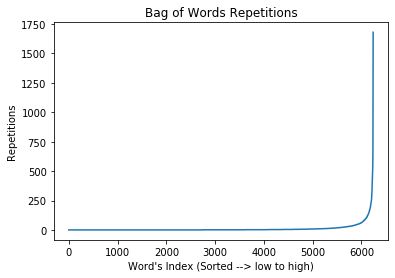

In [10]:
repetition = sorted(list(repetition_negative_word.values()))
plt.plot(np.arange(len(repetition)), repetition)
plt.xlabel("Word's Index (Sorted --> low to high)")
plt.ylabel("Repetitions")
plt.title("Bag of Words Repetitions")
plt.show()

## Frequencies 

#### Import my own library for this. 

In [11]:
from pystat import RelativeFrequency

In [12]:
neg_x = np.array(list(repetition_negative_word.values()))

In [13]:
rf = RelativeFrequency(neg_x)

In [14]:
data_range = rf.get_custom_data_range(neg_x.min(), neg_x.max()+5, 5)
crf = rf.classification(data_range, close=True)
crf.head()

,Interval,Frequency,%
0,1-6,4757,0.761973
1,6.1-11,450,0.072081
2,11.1-16,225,0.036040
3,16.1-21,144,0.023066
4,21.1-26,96,0.015377


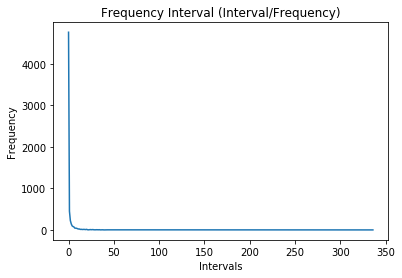

In [15]:
plt.plot(np.arange(crf.shape[0]), list(crf['Frequency']))
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.title('Frequency Interval (Interval/Frequency)')
plt.show()

Frequency interval plot shows that there is very much un-even distribution between words. There are many words having very large repaetition & there are many too which are repeated mearly 1-5 times in the dataset. Running classifier on this set is too costly. let's do feature engineering to get better and cost effective results.

## Feature Engineering 

Before testing diffrent-2 samples of data sets we need panelty parameter C. So, lets test best C value on all the dataset.

In [16]:
# Taking feature vectors constant first check best C
target_words = list(repetition_negative_word.keys())

training_texts = list(df1['text'])
x_train = sta.feature_vectors(training_texts, target_words)
y_train = np.array(df1['sentiment'])

cv_texts = list(df2['text'])
x_cv = sta.feature_vectors(cv_texts, target_words)
y_cv = np.array(df2['sentiment'])

test_texts = list(df3['text'])
x_test = sta.feature_vectors(test_texts, target_words)
y_test = np.array(df3['sentiment'])

Please patience. It could take several minute depends on your system configuration.


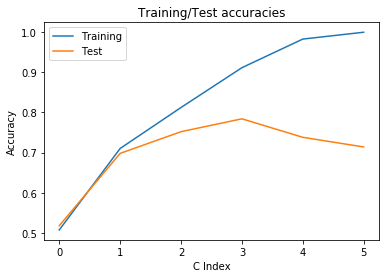

In [17]:
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
sta.best_c_analysis(x_train, y_train, x_cv, y_cv, c_list)

In [18]:
best_c = c_list[3]

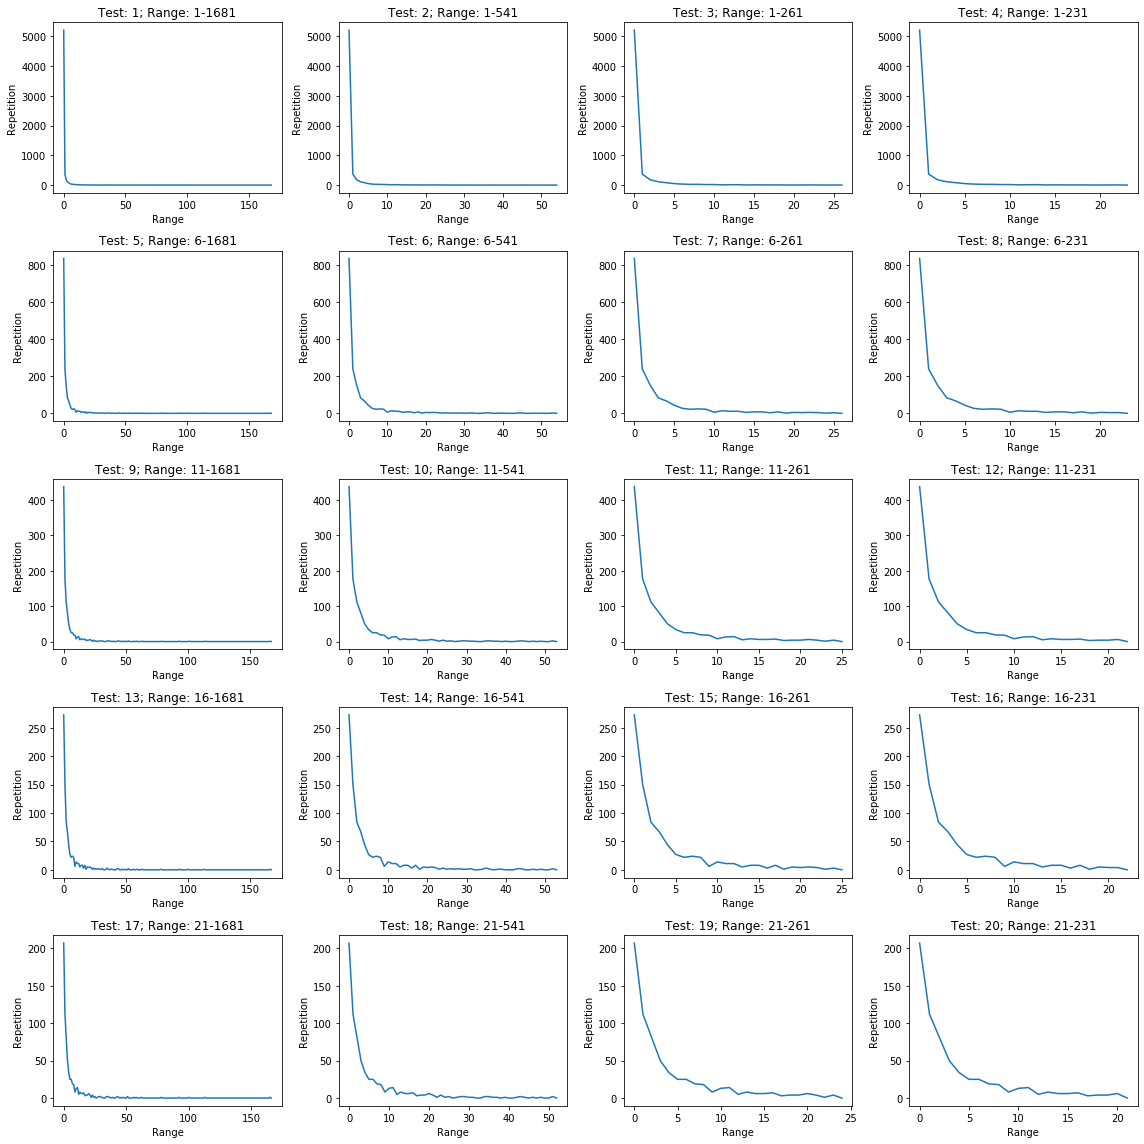

In [19]:
upper = [1, 6, 11, 16, 21]
lower = [1681, 541, 261, 231]
negative_words_list = sta.test_list(upper, lower, repetition_negative_word)

We get these 20 models and their curves. Curve 20 has best shape as it removes all much higher and lower repeatation words. But this is not enough, we need to further study these models to check which one is gives best result. 

for this we need to test them on SVM algorithm while keeping C value contnstant. Lets take C=0.1 which is the best_c earlier we get before feature engineering

In [20]:
best_neg_words = sta.best_negative_words(negative_words_list, training_texts, y_train, cv_texts, y_cv, best_c, 'linear')

Please patience. It could take several minute depends on your system configuration.


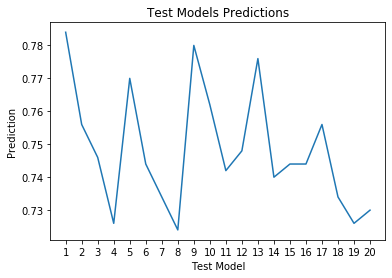

In [22]:
plt.plot(np.arange(1, len(best_neg_words)+1), best_neg_words)
plt.xticks(np.arange(1, len(best_neg_words)+1))
plt.xlabel("Test Model")
plt.ylabel("Prediction")
plt.title("Test Models Predictions")
plt.show()

Models prediction suggest that model number 1, 5, 9, 13 & 17 have high peaks, i.e. models carrying majority of high grequency words giving better result.

Model 1 has highest peak among all, buy we cant take it as it is too costly. We select model 9 it has second highest prediction and lesser costlier.

In [23]:
rep_df = pd.DataFrame(repetition_negative_word, index=[0])
rep_df3 = rep_df.iloc[0][rep_df.iloc[0]>=11]
rep_df4 = rep_df3[rep_df3<=1681]           

Now we find out best C for this model.

In [24]:
# Taking feature vectors constant first check best C
selected_target_words = list(rep_df.columns)

#training_texts = list(df1['text'])
x_train_sel = sta.feature_vectors(training_texts, selected_target_words)
y_train_sel = np.array(df1['sentiment'])

#cv_texts = list(df2['text'])
x_cv_sel = sta.feature_vectors(cv_texts, selected_target_words)
y_cv_sel = np.array(df2['sentiment'])

#test_texts = list(df3['text'])
x_test_sel = sta.feature_vectors(test_texts, selected_target_words)
y_test_sel = np.array(df3['sentiment'])

Please patience. It could take several minute depends on your system configuration.


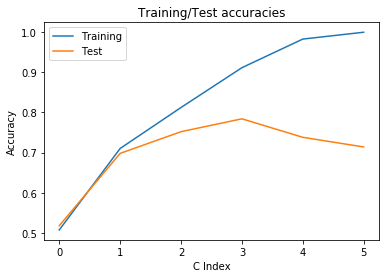

In [25]:
#c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
sta.best_c_analysis(x_train_sel, y_train_sel, x_cv_sel, y_cv_sel, c_list)

In [26]:
best_sel_c = c_list[3]

## Prediction 

In [27]:
# Prediction on test set.
sta.TestAccuracy(x_train_sel, y_train_sel, x_cv, y_cv).svm_accuracy(x_test_sel, y_test_sel, best_sel_c, 'linear')

0.774

# Perceptron 

Run perceptron on different iteration to see best iteration.

Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.


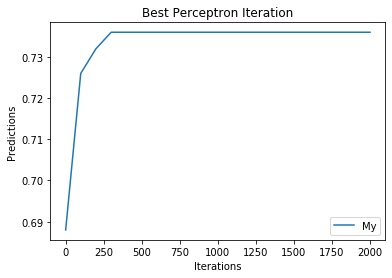

In [28]:
iteration = [1, 100, 200, 300, 400, 500, 1000, 1500, 2000]
sta.best_perceptron_itr(x_train_sel, y_train_sel, x_cv_sel, y_cv_sel, iteration)

In [29]:
best_iteration = iteration[3]

In [30]:
theta, theta0 = sta.Perceptron(x_train_sel, y_train_sel).perceptron(best_iteration)

In [31]:
pred = sta.Perceptron(x_train_sel, y_train_sel).prediction(x_cv_sel, theta, theta0)
target_name = ["Negative_sentiments", "positive_sentiments"]
print(sklearn.metrics.classification_report(y_cv_sel, pred, target_names=target_name))

                     precision    recall  f1-score   support

Negative_sentiments       0.78      0.69      0.73       259
positive_sentiments       0.70      0.79      0.74       241

           accuracy                           0.74       500
          macro avg       0.74      0.74      0.74       500
       weighted avg       0.74      0.74      0.74       500



In [32]:
ppc = sklearn.linear_model.Perceptron(max_iter=best_iteration, shuffle=True, random_state=0)
model = ppc.fit(x_train_sel, y_train_sel)
pred1 = model.predict(x_cv_sel)
print(sklearn.metrics.classification_report(y_cv_sel, pred1, target_names=target_name))

                     precision    recall  f1-score   support

Negative_sentiments       0.74      0.69      0.71       259
positive_sentiments       0.69      0.74      0.71       241

           accuracy                           0.71       500
          macro avg       0.72      0.71      0.71       500
       weighted avg       0.72      0.71      0.71       500



In [33]:
prc, rec = sta.precision_recall_curve(x_train_sel, y_train_sel, x_cv_sel, y_cv_sel, best_iteration)

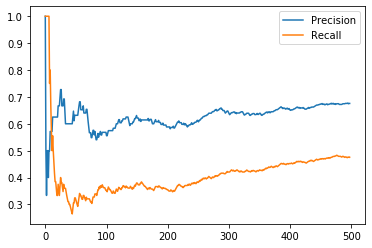

In [34]:
plt.plot(np.arange(len(prc[1:])), prc[1:], label="Precision")
plt.plot(np.arange(len(rec[1:])), rec[1:], label="Recall")
plt.legend(loc="best")
plt.show()

## Pegasos

Pegasos need two more variable apart from feature vectors & they are L & iteration. We need to find one keeping another one constant.

#### Best Iteration 

Keeping L=1 we find out best iteration.

In [35]:
l_list = [0.000001,0.00001,0.0001,0.001,0.01,0.1, 1, 1.5, 2,10]
iterations = [1, 10, 20, 50, 75, 100, 150, 200]

Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.


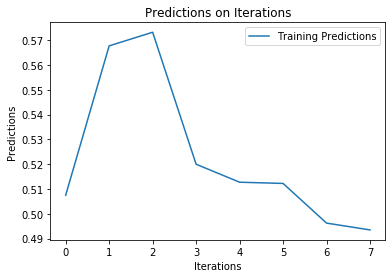

In [36]:
std_L = 1
sta.pegasos_best_iteration(x_train_sel, y_train_sel, std_L, iterations)

In [37]:
best_iteration  = iterations[2]

Now we find best L on best_iteration

Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.
Please patience. It could take several minute depends on your system configuration.


C:\Users\pc\Documents\Amit\edu\MIT\ML\project1\sentiment_analysis\sentiment_analysis.py:389: RuntimeWarning: overflow encountered in multiply
  current_theta = (1-eta*self.L)*current_theta


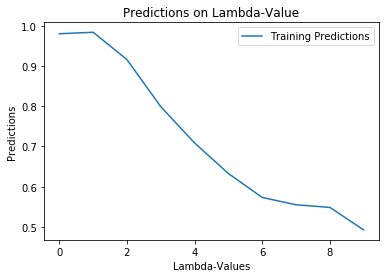

In [38]:
sta.pegasos_best_L(x_train_sel, y_train_sel, l_list, best_iteration)

In [39]:
best_L = l_list[1]

In [41]:
theta, theta0 = sta.Pegasos(x_train_sel, y_train_sel, best_L).pegasos_full(best_iteration)

In [42]:
sta.Pegasos(x_train_sel, y_train_sel, best_L).prediction_test(x_test_sel, y_test_sel, theta, theta0)

0.732

In [43]:
pred = sta.Pegasos(x_train_sel, y_train_sel, best_L).prediction(x_test_sel, theta, theta0)
target_name = ["Negative_sentiments", "positive_sentiments"]
print(sklearn.metrics.classification_report(y_test_sel, pred, target_names=target_name))

                     precision    recall  f1-score   support

Negative_sentiments       0.76      0.70      0.73       254
positive_sentiments       0.71      0.77      0.74       246

           accuracy                           0.73       500
          macro avg       0.73      0.73      0.73       500
       weighted avg       0.73      0.73      0.73       500

